# 1. Author

**Student Name**: Taejin, Kim<br>

# 2. Problem formulation

The aim of this project is to classify audio recordings as either deceptive or truthful stories based on features extracted from a set of 100 audio files. Accurately detecting deception is crucial for various contexts, such as law enforcement, courtroom testimonies, and interrogations.

The primary goal is to classify recordings into "truthful" or "deceptive" classes using a variety of machine learning models, including Support Vector Machines (SVM) and k-Nearest Neighbours (KNN). Additionally, an exploratory analysis using a Pairwise Maximum Overlap-Based Clustering (PMOC) approach was implemented to assess the variability of features and to explore differences between classes, aiding in feature selection and understanding underlying patterns.

Based on this, two main research questions arise.<br>
<b>1. Are there any distinguishable patterns or variability in audio features between truthful and deceptive samples?</b><br>
<b>2. How effective are classification models in distinguishing between truthful and deceptive stories?</b>

<b>Background</b>

Early deception research focused primarily on psychological tools like polygraphs<i> such as Larson et al.(1932)</i>. As technology advanced, machine learning has enabled more sophisticated deception detection using verbal and non-verbal cues. For instance, voice analysis has been employed to identify deceptive behavior, with studies showing that features like mean fundamental frequency (F0) can indicate stress during deception <i>(Sondhi et al., 2016)</i>.

This project aims to build on previous voice analysis approaches by using additional features such as `power`, `pitch mean`, `pitch standard deviation`, `fraction of voiced regions`, `average silence duration`(pauses), `spectral flux`, and `Pitch Consistency`. This comprehensive approach aims to enhance the accuracy of deception detection and contribute valuable insights to applications in law enforcement and interrogations.

# 3. Methodology

The methodology for this project focuses on the tasks needed to <b>train</b>, <b>validate</b>, <b>test</b>, and <b>evaluate</b> the model effectively. This section also provides a detailed overview of the steps involved in building a machine learning model. The project involves two primary stages:

<b>Exploratory analysis using PMOC</b>:

Applying the PMOC clustering technique to assess the variability of features and to explore differences between classes that might indicate characteristics related to deceptive or truthful stories.
Insights from PMOC were used to understand the feature distributions and assess their relevance in the classification models.<br>

<b>Supervised learning models</b>:

Training and validating KNN and SVM models on preprocessed features extracted from the audio recordings.
Evaluating the performance on a separate test set and combining KNN and SVM into an ensemble model using hard voting.

## 3.1 Training task 

The training task involves fitting a supervised learning model to the extracted audio features to classify each audio recording as either true or deceptive stroy.

The training dataset consists of feature vectors (`X_train`), which include <b>features</b> such as `power`, `pitch(mean)`, `pitch(standard deviation)`, `fraction of voiced regions`, `silence times`, and `spectral flux`. Additionally, any distinguishing characteristics related to deceptive or truthful story that are identified through <b>PMOC (Pairwise Maximum Overlap-based Clustering)</b> will be considered as new features. This will lead to meaningful groupings discovered through exploratory analysis as additional information for classification.<br>
The corresponding <b>labels</b> (`y_train`), indicating whether the story is true or deceptive.<br>

The training process involves inputting the feature vectors into the selected models and optimising the models' parameters to minimise classification error. This is crucial to ensure that the models learn to differentiate between deceptive and truthful story by effectively identifying patterns in the extracted features of audio recordings.

## 3.2 Validation task

When making adjustment in hyperparameters and ensuring the model is not overfitting to the training data, validation plays an important role.<br>
To achieve this, the dataset is split into training (70%), validation (15%), and testing (15%) subsets at the audio file level. This means that all segments derived from the same audio file are allocated to <u>only one subset to maintain statistical independence</u> and prevent <u>data leakage</u>. The validation set is then used to fine tune hyperparameters of the model;<br>
- The number of neighbours (`k`) for the <b>KNN</b> classifier.
- The value of the regularisation parameter (`C`) and kernel (`gamma`) in <b>SVM</b>.

It ensures that the model generalises well to unseen data before we evaluate it on the test set.<br>

In addition, validation for the experimental <b>PMOC analysis</b> involves checking whether the clustering approach is effective at identifying meaningful groups. Given that PMOC is used in an exploratory capacity, it also serves as a mechanism to evaluate whether if additional features derived from clustering, improve the accuracy of the main classification models (KNN and SVM).

## 3.3 Model evaluation

After training and validating the models, the models' performance is evaluated to understand how well each model can distinguish deceptive and truthful stories. This is performed on training and validation dataset to tune hyperparameters if necessary, and on testing dataset which represents unseen data that the model has not previously encountered. Following metrics are used to evaluate the model.<br>

------------------------

<b>Accuracy</b>: The percentage of correct predictions over the total number of predictions.<br>
$$
\text{Accuracy} = \frac{\text{Number of corrected prediction}}{\text{Total number of predictions}}
$$
<b>Confusion matrix</b>: A confusion matrix provides a table of the true positives, true negatives, false positives, and false negatives <br>
<div style="display: flex; justify-content: center;">

| True Positive  | False Positive |
| :------------: | :------------: |
| False Negative | True Negative  |
</div>

<b>Precision</b>: Measures how many of the positive predictions were actually correct<br>
$$
\text{Precision} = \frac{\text{TP}}{\text{TP+FP}}
$$
<b>Recall</b>: How many of the actual positives were correctly predicted.<br>
$$
\text{Recall} = \frac{\text{TP}}{\text{TP+FN}}
$$
<b>F1 score</b>: Combination of the precision and recall scores<br>
$$
\text{F1 score} = \frac{\text{2 x Precision x Recall}}{\text{Precision + Recall}}
$$

The above metrics help ensure that the model not only achieves high accuracy but also performs well across different categories, reducing bias toward the majority class.

# 4. Implemented Machine Learning(ML) prediction pipelines

## 4.1 Overview of pipelines

The ML pipelines implemented in this project consist of the following stages:<br>

`Exploratory analysis` : Clustering technique; PMOC is used to identify possible subgroups within the data, contributing to enriched feature extraction.<br>
`Transformation stage` : This includes feature extraction and normalisation to prepare the dataset for model training.<br>
`Model` : KNN, SVM are used to predict the deception labels of the audio recordings.<br>
`Ensemble` : For this project, voting classifier is used to take advantages of both the KNN and SVM to enhance model performance.<br>

More details for each stage is described below.<br>

## 4.2 Transformation stage

### 4.2.1 Exploratory analysis: Pairwise Maximum Overlap-Based Clustering (PMOC)

While this project is predominantly focused on <u>supervised learning</u>, an exploratory unsupervised clustering analysis is also performed to gain additional insights from the <u>training data</u> and potentially identify <b>new features</b> that could improve the classification task.<br>

<b>Purpose of PMOC in this project:</b><br>
The Pairwise Maximum Overlap-Based Clustering (PMOC) is used in an exploratory capacity to reveal underlying structures in the dataset. By analysing these groupings, additional features that can help improve the performance of classifiers can be uncovered. The primary idea is to identify patterns or subgroups that may exist beyond the predefined labels of truthful and deceptive.<br>
Significant clusters identified by PMOC could be incorporated as additional feature labels, which may potentially boost the accuracy of models such as KNN and SVM. This approach helps introduce a new dimension of information about the dataset, adding more context to aid the classification models.

<b> Concept of PMOC and how it works:</b><br>
The PMOC approach is based on the <u>median range of k-nearest neighbours distance</u> to determine a meaningful radius for overlap calculation. Using a pairwise overlap calculation, it will help to identify certain data points that have similarities significant enough to form clusters.<br>

<b>Radius calculation:</b><br>
To determine the neighbourhood for each point, the median distance to the k-th nearest neighbour was used. This approach is chosen as it is robust to outliers and represents a balanced measure of proximity.

<b>Pairwise overlap calculation</b><br>
Each data point is assigned a radius calculated based on the median distance, and overlaps between each pair of data points are computed to establish relationships that could indicate clusters.

<b>Hierarchical clustering</b><br>
Using the resulting overlap matrix, a hierarchical clustering approach is implemented to identify potential clusters within the dataset.

<b>Integration into additional feature extraction</b><br>
Significant clusters that are identified by PMOC are not used for classification but are instead converted into a new feature for each data point if <b><u>significant</u></b>. The resulting cluster labels serve as an enrichment of the feature set used in the classification models.<br>
This means that during training, models like KNN and SVM will have an additional feature dimension that represents the cluster membership.

<b>PMOC evaluation</b><br>
If additional features are identified, instead of directly evaluating PMOC as a classification model, its utility is assessed based on how the inclusion of PMOC derived clusters as features impacts the performance of KNN and SVM. Performance metrics such as accuracy, precision, recall, and F1-score are used to compare the effectiveness of the features derived from the PMOC analysis.

<b>Visualisation</b><br>
Principal Component Analysis (PCA) is used to reduce the high-dimensional features into 2D components and visualise the PMOC-derived clusters.
A dendrogram is also constructed to illustrate the hierarchical clustering results and to understand how the audio files relate to each other based on the overlap calculations.

### 4.2.2 Feature extraction<br>

Audio files are complex data types and therefore converting them into a format suitable for machine learning is necessary.  
<b>Seven distinct features</b> were initially extracted:  

|            Features            |   Meaning                        |     
|:------------------------------:|----------------------------------|
|`power`                         | Measures the energy in the signal |
|`pitch(mean)`                   | Average pitch value to capture fundamental frequency |
|`pitch(standard deviation)`     | Represents the variability in pitch, which could indicate hesitation |
|`the fraction of voiced regions`| The proportion of story that contains voiced sounds, providing insight into fluency |
|`silence times`<br>(`Total Silence Duration` & <br>`Average silence duration`)              | Duration and average length of pauses in story. This was inspired by research showing that pauses can be indicative of cognitive load during deception <i>(Chou, Liu, and Lee, 2021)</i> |
|`spectral flux`                 | Measures the rate of change in the power spectrum, capturing dynamic changes and irregularities in story that could be indicative of stress or deception <i>(Sporer & Schwandt, 2006)</i> |

These features were chosen for their ability to capture relevant vocal characteristics that may be indicative of deceptive or truthful story.  

Notably, `silence times` was inspired by findings in the study by <i>Chou, Liu, and Lee (2021)</i>, which highlights how silence duration and pause patterns can provide valuable insights into a speaker's cognitive load and hesitation, potentially correlating with deceptive behavior.<br>
Additionally, the use of `spectral flux` adds further depth to the analysis by capturing fluctuations in the frequency content that are indicative of changes in story dynamics, which can also be linked to deception <i>(Sporer & Schwandt, 2006)</i>.

<b>`Power`</b><br>
Extracted by using `np.sum(x**2)` / `len(x)` where `x` represents the audio signal. This measures the energy in the signal.

<b>`Pitch (Mean and standard deviation)`</b><br>
`Pitch(mean)` and `Pitch(standard deviation)` were both calculated using the `librosa.pyin()` method to capture the fundamental frequency (f0) from each audio sample. The mean was computed using `numpy.mean()`, while the standard deviation was computed using `numpy.std()`.  
These pitch-related features help capture the fundamental frequency of the speaker’s voice and its variability, respectively.

<b>`Fraction of voiced regions`</b><br>
Extracted by using `librosa.pyin()` to obtain voiced flags (indicating whether each frame is voiced or not). The proportion of voiced frames was then calculated using `numpy.mean()` on these voiced flags, providing insights into the fluency of story.

<b>`Silence times`</b><br>
Silence features such as <b>Total Silence Duration</b> and <b>average silence duration</b> were extracted using `librosa.effects.split()`. This method was used to identify non-silent regions of the audio. Subsequent calculations determined the overall silence and average duration of silence, providing valuable insights into hesitation and cognitive load.

<b>`Spectral flux`</b><br>
Spectral flux was computed using `librosa.stft()` followed by `numpy.diff()` to measure the rate of change in the power spectrum.<br>
The <b>spectral flux</b> represents how the power spectrum changes over time, highlighting rapid transitions and irregularities in the frequency content of the audio. These irregularities can provide information about the speaker’s stress level, hesitation, and potentially deceptive behavior <i>(Sporer & Schwandt, 2006)</i>.<br>

<b>After extracting features from audio files, data `X`<sup>(extracted features)</sup>,`y`<sup>(labels)</sup> are saved in `.npy` file format for convinient usage in further study of this project.</b>


## 4.3 Model stage<br>
In the model stage, several machine learning approaches are used to classify stories as true or deceptive.

### 4.3.1 Use of Elbow method first
The Elbow method was implemented as the first step to determine the optimal number of clusters (k) for the Pairwise Maximum Overlap Clustering (PMOC). The k value ranges from 2 to 15 were tested, and the sum of squared errors (SSE) was plotted against different values of k. The Elbow point, where the reduction in SSE starts to diminish, was chosen as the optimal k. In this case, k=2 appeared to be ideal, which aligns well with the binary nature of the data (truthful vs. deceptive).

### 4.3.2 Classification models<br>
K-Nearest Neighbours(KNN) and Support Vector Machines (SVM) are used as traditional ML models for classification.<br>
- Input: Feature vectors (`X`).
- Output: Predicted labels (true or deceptive).

Training Process:<br>
The models are trained on the training dataset using a supervised learning approach, adjusting parameters to minimise classification error.

### 4.3.3 Justification of chosen models

<b>K-Nearest neighbours (KNN)</b><br>
KNN is powerful to visualise how similar data points tend to certain cluster when the dataset is complex like audio features such as `power`, `pitch`, `voiced region`,`silence`. Since KNN is a non-parametric model, meaning that it is less effected by data distribution and this is particularly useful for this study's dataset, as the distribution of features related to deception (e.g., silence duration, pitch variability) may vary significantly across different speakers and languages.<br>

<b>Support Vector Machine (SVM)</b><br>
SVM is a powerful model that has ability to handle complex boundaries between classes by maximising the margin. Given the mixed features in the dataset (`power`, `pitch`, `voiced region`,`silence times`), SVM is well-suited to separate the true and deceptive classes effectively, even when the decision boundary is non-linear. The model is also less sensitive to outliers because it focuses on points closest to the decision boundary (support vectors). Similar to KNN, this is useful for this study's dataset given the variability in the way different people may tell deceptive or truthful stories.

## 4.4 Ensemble stage

In addition to the individual models, an ensemble method is also explored to improve classification accuracy. As the PMOC model is just an exploratory and unsupervised learning clustering, the ensemble will <u>only combine predictions from the classifiers(KNN, SVM).</u><br>
This ensemble stage is done to reduce the variance and bias of individual model and potentially improve the model's generalisation ability of the prediction. For ensemble stage, voting ensemble is applied where predictions from different models are combined to determine the final label.

- Input: Predicted labels from individual models.
- Output: Final predicted label, using a majority voting scheme.

Since KNN and SVM capture different aspects of the data, an ensemble approach helps combine their strengths. KNN provides insights based on neighbourhood voting, whereas SVM creates a strong boundary between the two classes. An ensemble helps leverage the diversity of these models.

# 5. Dataset


### 5.1 Dataset description<br>

The dataset consists of 100 audio samples from participants providing both truthful and deceptive story. To ensure statistical independence between `training`, `validation`, and `test` datasets, <u>each recording is kept exclusively in one of the datasets</u>. This prevents any 'data leakage' that might occur if segments from the same recording were used in both training and testing, thereby preserving the integrity of the model evaluation.

Instead of extracting multiple overlapping segments from each recording, the entire recording is assigned either to the training, validation, or test set. This approach guarantees that no multiple datasets are shared information from the same original recording, ensuring fair and unbiased evaluation.

The following features are extracted from each audio file:
- `Power`
- `Pitch` (mean & standard deviation)
- `Fraction of voiced region`
- `Silent time`
- `Spectral flux`

<b>Data Collection:</b><br>
Participants were given specific guidelines to ensure consistency across the recordings, such as focusing on personal experiences that involve visiting places or meeting people. The entire recording for each participant was either assigned to the training, validation, or test set to ensure independence between the datasets.

### 5.2 Dataset transformation overview<br>

Overview of the dataset was first structured into a DataFrame containing two attributes: audio files (complex attribute) and binary labels (`true` or `deceptive`). This allowed for easier manipulation and subsequent feature extraction.

In [1]:
import pandas as pd
import glob 

sample_path = 'MLEnd/deception/MLEndDD_stories_small/*.wav'
audio_files = glob.glob(sample_path)
MLEND_df = pd.read_csv('MLEndDD_story_attributes_small.csv').set_index('filename')
MLEND_df = MLEND_df.drop(['Language'], axis=1)

MLEND_df.head()

,Story_type
filename,
00001.wav,deceptive_story
00002.wav,true_story
00003.wav,deceptive_story
00004.wav,deceptive_story
00005.wav,deceptive_story


### 5.3 Data transformation - feature extraction

In [ ]:
import numpy as np
import librosa
from tqdm import tqdm

def getPitch(x, fs, winLen=0.02):
    p = winLen * fs
    frame_length = int(2 ** int(p - 1).bit_length())  
    hop_length = frame_length // 2
    f0, voiced_flag, voiced_probs = librosa.pyin(y=x, fmin=80, fmax=450, sr=fs,
                                                 frame_length=frame_length, hop_length=hop_length)
    return f0, voiced_flag

# Feature extraction function
def getXy(files, labels_file, scale_audio=False, frame_size=30, overlap=0.5, trim_seconds=3):
    X, y, file_labels = [], [], []  # Initialize lists for features, labels, and file IDs

    for file in tqdm(files):
        fileID = file.split('\\')[-1]  # Extract file ID from the file path

        # Get the label for the current file (true or deceptive)
        yi = labels_file.loc[fileID]['Story_type'] == 'true_story'

        fs = None  
        x, fs = librosa.load(file, sr=fs)

        # Ignore the first and last 3 seconds of the audio
        total_samples = len(x)
        samples_per_second = fs
        start_trim_samples = trim_seconds * samples_per_second
        end_trim_samples = total_samples - trim_seconds * samples_per_second
        x = x[start_trim_samples:end_trim_samples]

        # Frame extraction with overlap
        frame_samples = frame_size * samples_per_second
        step_size = int(frame_samples * (1 - overlap))
        
        for start in range(0, len(x) - frame_samples + 1, step_size):
            end = start + frame_samples
            x_frame = x[start:end]

            if scale_audio:
                x_frame = x_frame / np.max(np.abs(x_frame))

            # Extract features
            f0, voiced_flag = getPitch(x_frame, fs, winLen=0.02)
            power = np.sum(x_frame ** 2) / len(x_frame)
            pitch_mean = np.nanmean(f0) if np.mean(np.isnan(f0)) < 1 else 0
            pitch_std = np.nanstd(f0) if np.mean(np.isnan(f0)) < 1 else 0
            voiced_fr = np.mean(voiced_flag)

            rms = librosa.feature.rms(y=x_frame)
            db_values = librosa.amplitude_to_db(rms, ref=np.max)
            min_db = np.min(db_values)
            threshold_db = min_db + 3 
            threshold_db = max(threshold_db, 0)
            non_silent_intervals = librosa.effects.split(y=x_frame, top_db=-threshold_db)

            total_silence_duration = 0
            num_silence_segments = 0
            previous_end = 0

            for start_interval, end_interval in non_silent_intervals:
                silence_duration = (start_interval - previous_end) / fs
                if silence_duration > 0:
                    total_silence_duration += silence_duration
                    num_silence_segments += 1
                previous_end = end_interval
            avg_silence_duration = total_silence_duration / num_silence_segments if num_silence_segments > 0 else 0
            spectral_flux = np.mean(librosa.onset.onset_strength(y=x_frame, sr=fs, hop_length=512))
            # Append features and labels
            xi = [power, pitch_mean, pitch_std, voiced_fr, total_silence_duration, avg_silence_duration, spectral_flux]
            X.append(xi)
            y.append(yi)
            file_labels.append(fileID)  # Append the actual file ID, not the label
    return np.array(X), np.array(y), np.array(file_labels)
X, y, file_labels = getXy(audio_files, labels_file=MLEND_df)
np.save('features_extracted.npy', X)
np.save('labels_extracted.npy', y)
np.save('file_labels.npy', file_labels)

#### 5.3.1 Features, labels storation:
After performing feature extraction, it’s efficient to store the extracted features (`X`) and labels (`y`) to avoid recalculating them every time the notebook is reopened, which can be very time consuming.

To do this, features and labels are saved as `.npy` files using `NumPy` and can be loaded.<br>
(Features are extracted and saved in `features_extracted.npy`, labels are extracted and saved in `labels_extracted.npy`).<br>

In [3]:
import numpy as np

# Load the extracted features, labels, and file names
X = np.load('features_extracted.npy')
y = np.load('labels_extracted.npy')
file_set = np.load('file_labels.npy')

### 5.4 Splitting the data(Training, Testing)

To build an effective machine learning model, separating the data into <b>training</b>, <b>validation</b>, and <b>testing</b> datasets is crucial.<br>

The <b>training</b> dataset is used to train the model, while the testing dataset is used to evaluate the model’s performance on unseen data. This helps in preventing overfitting and ensures the model generalises well to new, unseen data.<br>

In this study, the ratio between training, validation, and testing data is set to approximately 70% : 15% : 15%. However, since multiple segments are extracted from the same audio file, all segments from one file are kept together in the same subset to maintain the statistical independence of the subsets and prevent data leakage. This approach means that segments from the same audio file are either all assigned to training, validation, or testing, rather than being split across these subsets.<br>

This data split helps to ensure that the model does not see similar segments from the same file during training and validation/testing, thereby improving the robustness and generalisability of the model.<br>

The resulting data split has the following shapes:

- Training data shape: (514, 7)
- Validation data shape: (117, 7)
- Testing data shape: (121, 7)

The `train_test_split` function from `Scikit-Learn` was implemented to randomly split the dataset into three parts, ensuring each subset represents the full diversity of the data.

Below is the code used for splitting the dataset:

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split

unique_files = np.unique(file_set)

train_files, temp_files = train_test_split(unique_files, test_size=0.3, random_state=42)
val_files, test_files = train_test_split(temp_files, test_size=0.5, random_state=42)

def split_data_by_files(files_subset, X, y, file_labels):
    indices = [i for i, file_set in enumerate(file_set) if file_set in files_subset]
    return X[indices], y[indices]

X_train, y_train = split_data_by_files(train_files, X, y, file_set)
X_val, y_val = split_data_by_files(val_files, X, y, file_set)
X_test, y_test = split_data_by_files(test_files, X, y, file_set)

print("Training data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (514, 7)
Validation data shape: (117, 7)
Testing data shape: (121, 7)


# 6. Experiments and results

Carry out your experiments here. Analyse and explain your results. Unexplained results are worthless.

### 6.1 Clustering analysis and exploration

The analysis started by applying PMOC to explore possible subgroup characteristics within the audio data. The PMOC technique helped identify clusters, which were then interpreted to derive a new composite feature termed `Pitch Consistency`. This new feature was added to the dataset, followed by evaluating its influence on model performance through classification models (KNN and SVM).

### 6.1.1 Applying Elbow method 
To determine the optimal number of neighbours (k) for PMOC, the elbow method was applied using training data. It involved plotting the sum of squared errors (SSE) for different k values.

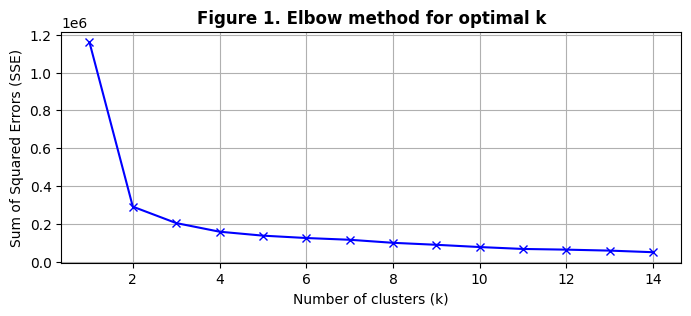

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
k_values = range(1, 15)
sse_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_train)
    sse = kmeans.inertia_
    sse_values.append(sse)

plt.figure(figsize=(8, 3))
plt.plot(k_values, sse_values, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Figure 1. Elbow method for optimal k', fontweight='bold')
plt.grid(True)
plt.show()

According to the <b>Figure 1</b>, choosing 2 clusters appears to be a reasonable choice. This means that dividing the data into two clusters should be sufficient to capture the main structure of the data without over-complicating the clustering. This makes sense in the context of this study; binary classification task, and also exploring if the PMOC clustering aligns well with the two classes.

### 6.1.2 PMOC implementation
The PMOC implementation involved using the median distance of the k-nearest neighbours to determine a meaningful radius for overlap calculation. The radius is used to compute pairwise overlaps among data points, which helps in identifying similarity relationships. The silhouette score was used to evaluate the effectiveness of clustering, ensuring that the identified clusters were meaningful.

Calculated radius for PMOC (median): 1.8333987600524482
Silhouette score for k=2: 0.44397803660431884


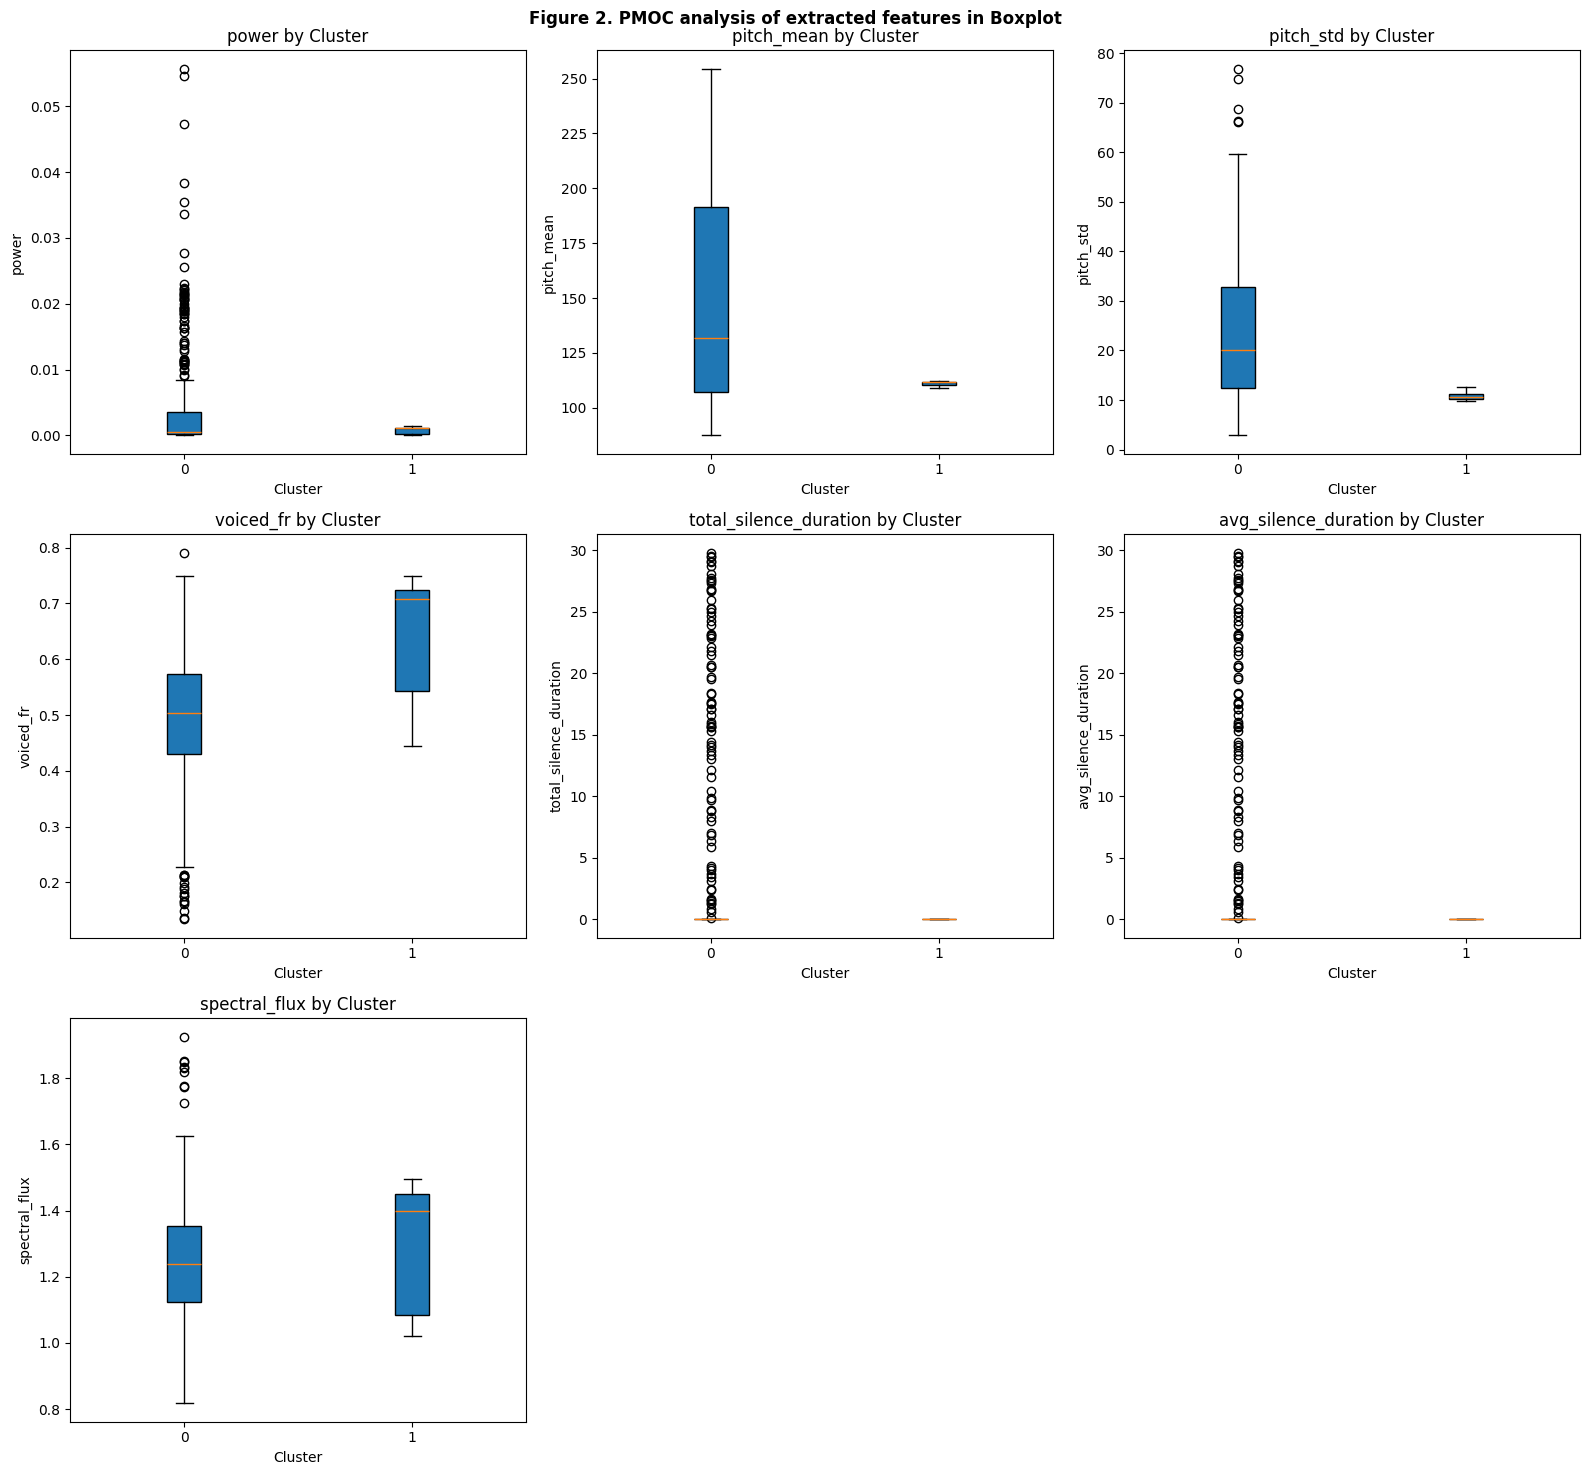

In [6]:
import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances, silhouette_score
from sklearn.cluster import KMeans
import math
import matplotlib.pyplot as plt

# Function to calculate overlap between points
def calculate_overlap(r, d):
    if d >= 2 * r:
        return 0
    elif d == 0:
        return math.pi * r**2
    else:
        acos_input = max(min(d / (2 * r), 1), -1)
        term1 = r**2 * math.acos(acos_input)
        sqrt_input = max(4 * r**2 - d**2, 0)
        term2 = (d / 2) * math.sqrt(sqrt_input)
        return abs(term1 - term2)

k = 2  # Number of nearest neighbours to consider based on Elbow method
num_points_train = len(X_train)
distance_matrix_train = pairwise_distances(X_train, metric='euclidean')
k_distances_train = np.sort(distance_matrix_train, axis=1)[:, 1:k+1] 

# Calculate the radius as the median distance to the k-th nearest neighbour
radius = np.median(k_distances_train)
print(f"Calculated radius for PMOC (median): {radius}")

# Calculate pairwise overlaps using the calculated radius
overlap_matrix = np.zeros((num_points_train, num_points_train))

for i in range(num_points_train):
    for j in range(i + 1, num_points_train):
        overlap_area = calculate_overlap(radius, distance_matrix_train[i, j])
        overlap_matrix[i, j] = overlap_area
        overlap_matrix[j, i] = overlap_area

# Apply k-means clustering using the overlap matrix
kmeans = KMeans(n_clusters=k, random_state=42)
labels_kmeans = kmeans.fit_predict(overlap_matrix)

# Evaluate clustering using silhouette score with k=2
silhouette_avg = silhouette_score(overlap_matrix, labels_kmeans)
print(f"Silhouette score for k=2: {silhouette_avg}")

feature_names = ["power", "pitch_mean", "pitch_std", "voiced_fr", "total_silence_duration", "avg_silence_duration", "spectral_flux"]
X_train_df = pd.DataFrame(X_train, columns=feature_names)
X_train_df['Cluster Label'] = labels_kmeans
plt.figure(figsize=(16, 15))
for i, feature in enumerate(feature_names):
    data_plot = [X_train_df[X_train_df['Cluster Label'] == label][feature] for label in X_train_df['Cluster Label'].unique()]
    plt.subplot(3, 3, i + 1)
    plt.suptitle("Figure 2. PMOC analysis of extracted features in Boxplot", fontweight='bold')
    plt.boxplot(data_plot, tick_labels=X_train_df['Cluster Label'].unique(), patch_artist=True)
    plt.title(f"{feature} by Cluster")
    plt.xlabel("Cluster")
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

### 6.1.3 Clustering analysis and feature interpretation

<u>The silhouette score of 0.444</u> indicates moderate cohesion and separation between the clusters. This suggests that while some features do provide meaningful distinctions between clusters 0 and 1, there is still considerable overlap, limiting the clarity of the differentiation.

Features such as `pitch mean`, `pitch standard deviation`, and `voiced fraction` show noticeable differences between the clusters, highlighting their potential contribution to distinguishing truthful and deceptive stories. Specifically, `voiced fraction` exhibits improved separation between clusters compared to previous analyses. However, `Total Silence Duration` and `average silence duration` demonstrate minimal variability between the clusters, with the majority of the data points near zero, indicating their limited utility for clustering in this analysis.

`Spectral flux` shows moderate separation, but the presence of overlap reduces its effectiveness as a differentiating feature.

<b>New feature proposal:</b></br>

`Pitch Consistency` <br>

To improve classification quality, a new feature called `Pitch Consistency` is proposed. This feature measures how consistently the pitch range is maintained throughout the duration of an audio frame, capturing the variability of the difference between maximum and minimum pitch values across smaller segments.<br>

`Pitch Consistency` could help highlight speakers who maintain a stable vocal pitch versus those whose pitch varies significantly, which may correlate with differences in cognitive load or emotional stress. For instance, more variable pitch rates could indicate hesitation or deliberate modulation, potentially linked to deceptive behavior. Thus, including `Pitch Consistency` might enhance the clustering by adding an element sensitive to the stability of the speaker's vocal dynamics during storytelling.

### 6.1.4 Feature reduction addressing redundancy

Upon examining the box plots in <b>Figure 2</b>, it can be observed that <b>Total Silence Duration</b> and <b>Average silence duration</b> exhibit similar patterns across the clusters. This similarity suggests that these features might carry overlapping information, potentially leading to redundancy in the dataset. To further evaluate this, a <b>correlation heatmap</b> was constructed(<b>Figure 3</b>) to visually identify and quantify the correlation between features.

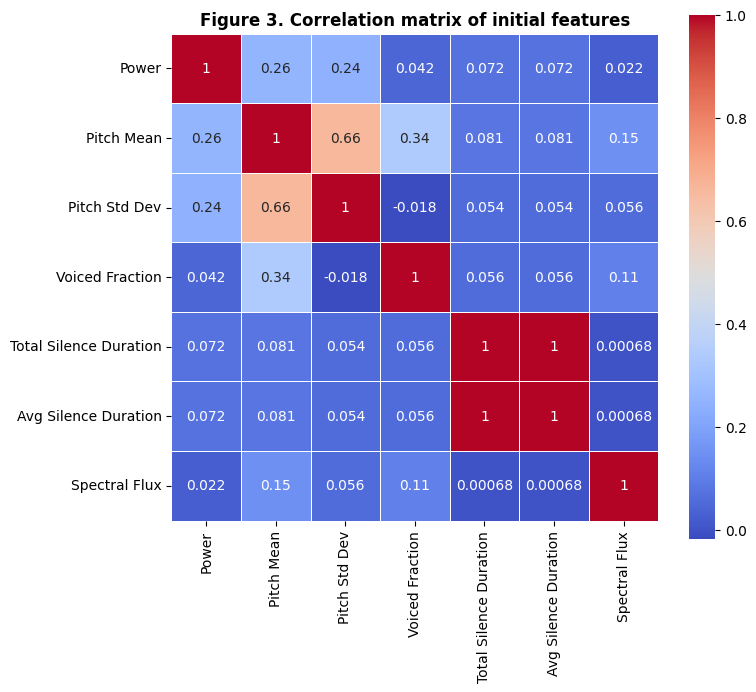

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

feature_names = ["Power", "Pitch Mean", "Pitch Std Dev", "Voiced Fraction", "Total Silence Duration", "Avg Silence Duration", "Spectral Flux"]
X_train_df = pd.DataFrame(X_train, columns=feature_names)
correlation_matrix = X_train_df.corr()
plt.figure(figsize=(8, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='white', cbar=True, square=True)
plt.title("Figure 3. Correlation matrix of initial features", fontweight='bold')
plt.tight_layout()
plt.show()

The correlation heatmap demonstrated a strong correlation between `Total Silence Duration` and `Average silence duration`, indicating that these features are almost the same and could likely be combined or one could be removed to simplify the model. Given this redundancy, `Total Silence Duration` was subsequently removed from the feature set.

### 6.1.5 Feature modified<sup>(+`Pitch Consistency`, -`Total Silence Duration`)</sup> & dataset split repeat

<b>Calculating `Pitch Consistency`</b>:<br>
`Pitch Consistency` is introduced to capture how stable the pitch is throughout the entire audio frame, offering a measure of vocal control and emotional steadiness.

<b>Segment division</b>:<br>
For each 30-second frame, the pitch range is calculated by determining the difference between the maximum and minimum pitch values across the frame. This captures the vocal range exhibited by the speaker during that segment.

<b>Pitch range calculation</b>:<br>
For each segment, the pitch range is calculated by determining the difference between the maximum and minimum pitch values. This captures the vocal range exhibited by the speaker during that segment.

<b>`Pitch Consistency` score</b>:<br>
The consistency score is derived by measuring the variance in pitch across the entire 30 seconds frame. This variance provides an indication of whether the speaker's vocal pitch remains steady or fluctuates significantly. Lower variance implies more consistent pitch, which could be associated with confident, less stressed speech, while higher variance might indicate hesitation or emotional stress.

In [ ]:
import numpy as np
import librosa
from tqdm import tqdm

def getPitch(x, fs, winLen=0.02):
    p = winLen * fs
    frame_length = int(2 ** int(p - 1).bit_length())  
    hop_length = frame_length // 2
    f0, voiced_flag, voiced_probs = librosa.pyin(y=x, fmin=80, fmax=450, sr=fs,
                                                 frame_length=frame_length, hop_length=hop_length)
    return f0, voiced_flag

# Feature extraction function with new feature (Pitch Consistency)
def getXy(files, labels_file, scale_audio=False, frame_size=30, overlap=0.5, trim_seconds=3):
    X, y, file_labels = [], [], []

    for file in tqdm(files):
        fileID = file.split('\\')[-1]
        yi = labels_file.loc[fileID]['Story_type'] == 'true_story'
        file_track = labels_file.loc[fileID]
        fs = None  
        x, fs = librosa.load(file, sr=fs)
        # Ignore the first and last 3 seconds of the audio
        total_samples = len(x)
        samples_per_second = fs
        start_trim_samples = trim_seconds * samples_per_second
        end_trim_samples = total_samples - trim_seconds * samples_per_second
        x = x[start_trim_samples:end_trim_samples]
        frame_samples = frame_size * samples_per_second
        step_size = int(frame_samples * (1 - overlap))
        for start in range(0, len(x) - frame_samples + 1, step_size):
            end = start + frame_samples
            x_frame = x[start:end]
            if scale_audio:x_frame = x_frame / np.max(np.abs(x_frame))
            f0, voiced_flag = getPitch(x_frame, fs, winLen=0.02)
            power = np.sum(x_frame ** 2) / len(x_frame)
            pitch_mean = np.nanmean(f0) if np.mean(np.isnan(f0)) < 1 else 0
            pitch_std = np.nanstd(f0) if np.mean(np.isnan(f0)) < 1 else 0
            voiced_fr = np.mean(voiced_flag)
            # Calculate 'Pitch Consistency' (variance of pitch)
            pitch_variance = np.nanvar(f0) if np.mean(np.isnan(f0)) < 1 else 0
            # Silence (average silence duration)
            rms = librosa.feature.rms(y=x_frame)
            db_values = librosa.amplitude_to_db(rms, ref=np.max)
            min_db = np.min(db_values)
            threshold_db = min_db + 3 
            threshold_db = max(threshold_db, 0)
            non_silent_intervals = librosa.effects.split(y=x_frame, top_db=threshold_db)
            total_silence_duration = 0
            num_silence_segments = 0
            previous_end = 0

            for start_interval, end_interval in non_silent_intervals:
                silence_duration = (start_interval - previous_end) / fs
                if silence_duration > 0:
                    total_silence_duration += silence_duration
                    num_silence_segments += 1
                previous_end = end_interval
            avg_silence_duration = total_silence_duration / num_silence_segments if num_silence_segments > 0 else 0
            spectral_flux = np.mean(librosa.onset.onset_strength(y=x_frame, sr=fs, hop_length=512))
            xi = [power, pitch_mean, pitch_std, voiced_fr, avg_silence_duration, spectral_flux, pitch_variance]
            X.append(xi)
            y.append(yi)
            file_labels.append(fileID)
    return np.array(X), np.array(y), np.array(file_labels)

X, y, file_labels = getXy(audio_files, labels_file=MLEND_df)

np.save('PMOCeatures_extracted.npy', X)
np.save('PMOClabels_extracted.npy', y)
np.save('PMOCfile_labels.npy', file_labels)

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split

X_updated = np.load('PMOCfeatures_extracted.npy')
y_updated = np.load('PMOClabels_extracted.npy')
file_labels = np.load('PMOCfile_labels.npy', allow_pickle=True)

unique_files = np.unique(file_labels)
train_files, temp_files = train_test_split(unique_files, test_size=0.3, random_state=42)
val_files, test_files = train_test_split(temp_files, test_size=0.5, random_state=42)

def split_data_by_files(files_subset, X, y, file_labels):
    indices = [i for i, file_label in enumerate(file_labels) if file_label in files_subset]
    return X[indices], y[indices]

X_train_updated, y_train_updated = split_data_by_files(train_files, X_updated, y_updated, file_labels)
X_val_updated, y_val_updated = split_data_by_files(val_files, X_updated, y_updated, file_labels)
X_test_updated, y_test_updated = split_data_by_files(test_files, X_updated, y_updated, file_labels)

print("Training data shape:", X_train_updated.shape)
print("Validation data shape:", X_val_updated.shape)
print("Testing data shape:", X_test_updated.shape)

Training data shape: (514, 7)
Validation data shape: (117, 7)
Testing data shape: (121, 7)


### 6.1.6 Evaluating feature importance: Initial vs after adding `Pitch Consistency`
To evaluate the impact of the newly added `Pitch Consistency` feature, a <b>Random Forest model</b> was trained on both the initial and updated datasets. Feature importances were compared to determine if the new feature had a significant influence on model performance. By examining the importance scores, insights were gathered on whether `Pitch Consistency` effectively captured additional characteristics that were not covered by the original feature set.

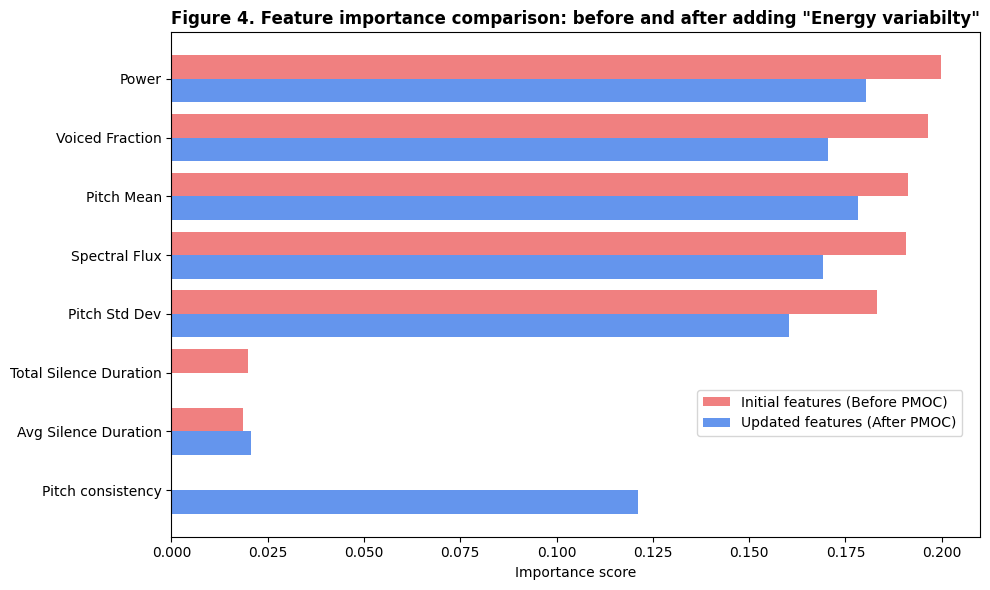

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

rf_model_initial = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_initial.fit(X_train, y_train)
initial_importance = rf_model_initial.feature_importances_
features_initial = ["Power", "Pitch Mean", "Pitch Std Dev", "Voiced Fraction", "Total Silence Duration", "Avg Silence Duration", "Spectral Flux"]
sorted_idx_initial = np.argsort(initial_importance)[::-1]
sorted_features_initial = [features_initial[i] for i in sorted_idx_initial]
sorted_importance_initial = initial_importance[sorted_idx_initial]

# --------------------------------------------------------------------------
rf_model_updated = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_updated.fit(X_train_updated, y_train_updated)
updated_importance = rf_model_updated.feature_importances_
features_updated = ["Power", "Pitch Mean", "Pitch Std Dev", "Voiced Fraction", "Avg Silence Duration", "Spectral Flux", "Pitch Consistency"]
updated_importance_dict = dict(zip(features_updated, updated_importance))
sorted_importance_updated = [updated_importance_dict.get(feature, 0) for feature in sorted_features_initial + ["Pitch Consistency"]]

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(np.arange(len(sorted_importance_initial)) - 0.2, sorted_importance_initial, height=0.4, color='lightcoral', label='Initial features (Before PMOC)')
ax.barh(np.arange(len(sorted_importance_updated)) + 0.2, sorted_importance_updated, height=0.4, color='cornflowerblue', label='Updated features (After PMOC)')
sorted_features_combined = sorted_features_initial + ["Pitch Consistency"]
ax.set_yticks(np.arange(len(sorted_features_combined)))
ax.set_yticklabels(sorted_features_combined)
ax.set_xlabel('Importance score')
ax.set_title('Figure 4. Feature importance comparison: before and after adding "Energy variabilty"', fontweight='bold')
# The title should be refined; 'Energy variability' -> 'Pitch Consistency'

plt.legend(loc=(0.65, 0.2))
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()


##### <u>Insights from <b>Figure 4</b>:</u>

<b>`Power`, `Pitch mean`, `Pitch std`, `Voiced fraction`, `Spectral flux`:</b><br>
These features have similar importance scores in both the initial (red) and updated (blue) datasets. This consistency indicates that changes in the feature set (including the removal of `Total Silence Duration` and addition of `Pitch Consistency`) had minimal impact on the significance of these features. They remain key contributors to the classification model.

<b>`Average Silence Duration`:</b><br>
The importance of `Average Silence Duration` slightly increased in the updated dataset, suggesting it plays a more significant role after the removal of `Total Silence Duration`. This may indicate that some information previously captured by `Total Silence Duration` is now represented by `Average Silence Duration`.

<b>`Pitch Consistency`:</b><br>
The newly added feature, `Pitch Consistency`, shows a relatively low importance score compared to other features. This suggests that while it may add value to the classification model, it is not yet as impactful as the other core features. Nonetheless, it adds an additional dimension that may help differentiate between speaker patterns or behaviours, especially those involving variations in pitch stability during storytelling.

## 6.2 Classification model results
### 6.2.1 Implementation of models and evaluation score(both initial vs updated features)

After extracting features to aid models for classification, KNN and SVM models were implemented on training and validating data. First using the <u>initial features</u> and subsequently using the <u>updated feature</u> set (including the `Pitch Consistency` feature). The results were compared to evaluate any improvement or degradation in performance as a result of adding the new feature.

<b>Figure 5</b>.(see below) is a visual comparison that contrasts the feature importances for initial vs updated features.

In [11]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

results = []

def evaluate_model(model, X_train, y_train, X_val, y_val, model_name, dataset_label, normalisation_status):
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    train_precision = precision_score(y_train, y_train_pred, zero_division=1)
    val_precision = precision_score(y_val, y_val_pred, zero_division=1)
    train_recall = recall_score(y_train, y_train_pred, zero_division=1)
    val_recall = recall_score(y_val, y_val_pred, zero_division=1)
    train_f1 = f1_score(y_train, y_train_pred, zero_division=1)
    val_f1 = f1_score(y_val, y_val_pred, zero_division=1)
    cm = confusion_matrix(y_val, y_val_pred)
    cm_str = f"[{cm[0][0]}, {cm[0][1]}] [{cm[1][0]}, {cm[1][1]}]"
    results.append([model_name, dataset_label, normalisation_status, 
                    train_accuracy, val_accuracy, train_precision, val_precision,
                    train_recall, val_recall, train_f1, val_f1, cm_str])

### ---- SVM model without normalisation (Initial dataset) ---- ###
model_svm_initial = svm.SVC(C=1, gamma='scale')
model_svm_initial.fit(X_train, y_train)
evaluate_model(model_svm_initial, X_train, y_train, X_val, y_val, 'SVM', 'Initial', 'X')

### ---- SVM model without normalisation (Updated dataset) ---- ###
model_svm_updated = svm.SVC(C=1, gamma='scale')
model_svm_updated.fit(X_train_updated, y_train_updated)
evaluate_model(model_svm_updated, X_train_updated, y_train_updated, X_val_updated, y_val_updated, 'SVM', 'Updated', 'X')

### ---- Normalisation ---- ###
mean_svm = X_train.mean(axis=0)
std_svm = X_train.std(axis=0)
X_train_svm_norm = (X_train - mean_svm) / std_svm
X_val_svm_norm = (X_val - mean_svm) / std_svm
mean_svm_updated = X_train_updated.mean(axis=0)
std_svm_updated = X_train_updated.std(axis=0)
X_train_updated_svm_norm = (X_train_updated - mean_svm_updated) / std_svm_updated
X_val_updated_svm_norm = (X_val_updated - mean_svm_updated) / std_svm_updated

### ---- SVM model with normalisation (Initial dataset) ---- ###
model_svm_initial_norm = svm.SVC(C=1, gamma='scale')
model_svm_initial_norm.fit(X_train_svm_norm, y_train)
evaluate_model(model_svm_initial_norm, X_train_svm_norm, y_train, X_val_svm_norm, y_val, 'SVM', 'Initial', 'O')

### ---- SVM model with normalisation (Updated dataset) ---- ###
model_svm_updated_norm = svm.SVC(C=1, gamma='scale')
model_svm_updated_norm.fit(X_train_updated_svm_norm, y_train_updated)
evaluate_model(model_svm_updated_norm, X_train_updated_svm_norm, y_train_updated, X_val_updated_svm_norm, y_val_updated, 'SVM', 'Updated', 'O')

### ---- KNN model without normalisation ---- ###
knn_initial = KNeighborsClassifier(n_neighbors=2)
knn_initial.fit(X_train, y_train)
evaluate_model(knn_initial, X_train, y_train, X_val, y_val, 'KNN', 'Initial', 'X')

knn_updated = KNeighborsClassifier(n_neighbors=2)
knn_updated.fit(X_train_updated, y_train_updated)
evaluate_model(knn_updated, X_train_updated, y_train_updated, X_val_updated, y_val_updated, 'KNN', 'Updated', 'X')

### ---- KNN model with normalisation ---- ###
X_train_knn_norm = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
X_val_knn_norm = (X_val - X_train.mean(axis=0)) / X_train.std(axis=0)

X_train_updated_knn_norm = (X_train_updated - X_train_updated.mean(axis=0)) / X_train_updated.std(axis=0)
X_val_updated_knn_norm = (X_val_updated - X_train_updated.mean(axis=0)) / X_train_updated.std(axis=0)

knn_initial_norm = KNeighborsClassifier(n_neighbors=2)
knn_initial_norm.fit(X_train_knn_norm, y_train)
evaluate_model(knn_initial_norm, X_train_knn_norm, y_train, X_val_knn_norm, y_val, 'KNN', 'Initial', 'O')

knn_updated_norm = KNeighborsClassifier(n_neighbors=2)
knn_updated_norm.fit(X_train_updated_knn_norm, y_train_updated)
evaluate_model(knn_updated_norm, X_train_updated_knn_norm, y_train_updated, X_val_updated_knn_norm, y_val_updated, 'KNN', 'Updated', 'O')

### ---- Results dataframe ---- ###
results_df = pd.DataFrame(results, columns=[
    'Model', 'Feature Set', 'Normalisation', 'Training Accuracy', 'Validation Accuracy',
    'Training Precision', 'Validation Precision', 'Training Recall', 'Validation Recall',
    'Training F1 Score', 'Validation F1 Score', 'Confusion matrix'])
print('Figure 5. KNN and SVM models results and evaluation scores')
results_df

Figure 5. KNN and SVM models results and evaluation scores


,Model,Feature Set,Normalisation,Training Accuracy,Validation Accuracy,Training Precision,Validation Precision,Training Recall,Validation Recall,Training F1 Score,Validation F1 Score,Confusion matrix
0,SVM,Initial,X,0.566148,0.299145,0.566148,0.299145,1.000000,1.000000,0.722981,0.460526,"[0, 82] [0, 35]"
1,SVM,Updated,X,0.571984,0.299145,0.569472,0.299145,1.000000,1.000000,0.725686,0.460526,"[0, 82] [0, 35]"
2,SVM,Initial,O,0.791829,0.435897,0.773810,0.308642,0.893471,0.714286,0.829346,0.431034,"[26, 56] [10, 25]"
3,SVM,Updated,O,0.791829,0.427350,0.770588,0.300000,0.900344,0.685714,0.830428,0.417391,"[26, 56] [11, 24]"
4,KNN,Initial,X,0.834630,0.717949,1.000000,0.525000,0.707904,0.600000,0.828974,0.560000,"[63, 19] [14, 21]"
5,KNN,Updated,X,0.828794,0.615385,1.000000,0.386364,0.697595,0.485714,0.821862,0.430380,"[55, 27] [18, 17]"
6,KNN,Initial,O,0.931907,0.504274,1.000000,0.317460,0.879725,0.571429,0.936015,0.408163,"[39, 43] [15, 20]"
7,KNN,Updated,O,0.929961,0.487179,1.000000,0.328767,0.876289,0.685714,0.934066,0.444444,"[33, 49] [11, 24]"


### 6.2.2 Interpretation of results and adjustment(hyperparameter)

<b>General Overview of Models and Feature Sets:</b><br>

SVM and KNN were both trained using the initial and updated feature sets(+ `Pitch Consistency`, - `Total Silence Duration`), with and without normalisation. Training and validation accuracies, precision, recall, F1 scores, and confusion matrices were considered to evaluate model performance.

<u><i>Key insights:</i></u><br>

<b>SVM results:</b><br>
<i>Initial feature Set (Non-normalised):</i><br>

Training accuracy is 0.566, while validation accuracy is significantly lower at 0.299. This indicates poor generalisation, with the model struggling to predict accurately on unseen data.<br>

The high recall of 1.000 for validation, contrasted with low precision (0.299), suggests that the model is overestimating positive classes, resulting in many false positives.<br>

The confusion matrix [0, 82], [0, 35] shows that the model is predicting the positive class almost entirely, leading to a high number of false positives and a failure to predict negative classes correctly.<br>

<i>Updated feature set (Non-normalised):</i><br>

Validation accuracy remained unchanged at 0.299, suggesting that adding `Pitch Consistency` and removing `Total Silence Duration` did not improve the model's predictive capability. This indicates that the updated feature set does not provide additional useful information for classification.<br>

High recall (1.000) and low precision (0.299) indicate that the model continues to overestimate the positive class, failing to improve its ability to distinguish true positives from false positives effectively.<br>


<i>With normalised data:</i><br>

For both feature sets, normalisation slightly improved validation accuracy for the initial set (from 0.299 to 0.436). This suggests some positive impact on model balance, but overall performance still remains poor. The updated set, however, showed a decline in validation accuracy to 0.427, indicating that the new feature `Pitch Consistency` did not help the model generalise better.<br>

-----------------------

<b>KNN Results:</b><br>
<i>Initial feature set (Non-normalised):</i><br>

With a validation accuracy of 0.718, the KNN model significantly outperformed SVM when using the initial feature set without normalisation.<br>
Training precision is 1.000, showing that the model fits the positive class perfectly during training, but the validation metrics (precision 0.600 and recall 0.600) indicate overfitting and a moderate balance of false positives and false negatives.

<i>Updated feature set (Non-normalised):</i><br>

Validation accuracy dropped from 0.718 to 0.615. This reduction suggests that the `Pitch Consistency` feature does not contribute effectively to improving the model and may even introduce additional noise.<br>

<i>With normalised Data:</i><br>

For the initial feature set, validation accuracy was 0.504 after normalisation, indicating a decrease in performance, while the updated feature set led to 0.487 validation accuracy. Normalisation appeared to reduce the effectiveness of KNN overall in these cases.<br>

<b>Comparative Observations:</b><br>
<b>KNN vs SVM:</b>

KNN consistently outperforms SVM in terms of validation metrics across all scenarios. This suggests that KNN is more suitable for this dataset, possibly because the decision boundaries are better captured by a non-parametric model.<br>

Normalisation was beneficial in some cases, particularly for SVM, where it improved accuracy slightly, but for KNN, the impact was mixed, sometimes worsening performance. The data distribution and scale seem to be better handled by KNN without normalisation.<br>

<b>Impact of Feature Set Changes:</b><br>
The updated feature set involving the addition of Pitch Consistency and the removal of `Total Silence Duration` did not significantly enhance the model's performance. For non-normalised data, the updated feature set often resulted in reduced validation accuracy, indicating that these modifications did not capture more discriminative information.<br>
The confusion matrices for the updated feature set indicate an increase in false positives and false negatives compared to the initial set, suggesting a decrease in both sensitivity and specificity.

-------------------

Given the poor performance of the initial SVM model, especially regarding validation accuracy and the significant gap between training and validation metrics, hyperparameter tuning was applied to the SVM to enhance performance.<br>
The goal was to achieve better generalisation by reducing overfitting observed during training, which was reflected by improving validation metrics. By adjusting key hyperparameters such as `C` (the regularisation parameter) and `gamma` (which influences kernel flexibility), the model could be adjusted to better balance complexity and bias.

A <b>Grid search</b> with cross-validation was used to explore a range of values for `C` and `gamma`, ensuring that the best parameter combination was selected to optimise cross-validation performance

In [12]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [10, 50, 100, 500, 1000], # common C values
    'gamma': [0.001, 0.01, 0.05, 0.1], # common gamma values
    'kernel': ['rbf']
}
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='f1', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters found: ", grid_search.best_params_)
print("Best Score achieved: ", grid_search.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters found:  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best Score achieved:  0.6634966759124731


In [13]:
results_comparison = []

### ---- Function to compare model performance ---- ###
def evaluate_model_comparison(model, X_train, y_train, X_val, y_val, model_name, dataset_label, normalisation_status, tuned=False):
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    train_precision = precision_score(y_train, y_train_pred, zero_division=1)
    val_precision = precision_score(y_val, y_val_pred, zero_division=1)
    train_recall = recall_score(y_train, y_train_pred, zero_division=1)
    val_recall = recall_score(y_val, y_val_pred, zero_division=1)
    train_f1 = f1_score(y_train, y_train_pred, zero_division=1)
    val_f1 = f1_score(y_val, y_val_pred, zero_division=1)
    cm = confusion_matrix(y_val, y_val_pred)
    cm_str = f"[{cm[0][0]}, {cm[0][1]}] [{cm[1][0]}, {cm[1][1]}]"
    results_comparison.append([model_name + ("_tuned" if tuned else ""),
                               dataset_label, normalisation_status, 
                               train_accuracy, val_accuracy, 
                               train_precision, val_precision,
                               train_recall, val_recall,
                               train_f1, val_f1, cm_str])

### ----- Hyperparmeter untuned ----- ###
### ---- without normalisation (initial dataset) ---- ###
model_svm_initial = svm.SVC(C=1, gamma='scale')  # untuned model
model_svm_initial.fit(X_train, y_train)
evaluate_model_comparison(model_svm_initial, X_train, y_train, X_val, y_val, 'SVM', 'Initial', 'X')

### ---- without normalisation (updated dataset) ---- ###
model_svm_updated = svm.SVC(C=1, gamma='scale')  # untuned model
model_svm_updated.fit(X_train_updated, y_train_updated)
evaluate_model_comparison(model_svm_updated, X_train_updated, y_train_updated, X_val_updated, y_val_updated, 'SVM', 'Updated', 'X')

### ---- with normalisation (initial dataset) ---- ###
mean_svm = X_train.mean(axis=0)
std_svm = X_train.std(axis=0)
X_train_svm_norm = (X_train - mean_svm) / std_svm
X_val_svm_norm = (X_val - mean_svm) / std_svm

model_svm_initial_norm = svm.SVC(C=1, gamma='scale')  # untuned model
model_svm_initial_norm.fit(X_train_svm_norm, y_train)
evaluate_model_comparison(model_svm_initial_norm, X_train_svm_norm, y_train, X_val_svm_norm, y_val, 'SVM', 'Initial', 'O')

### ---- with normalisation (updated dataset) ---- ###
mean_svm_updated = X_train_updated.mean(axis=0)
std_svm_updated = X_train_updated.std(axis=0)
X_train_updated_svm_norm = (X_train_updated - mean_svm_updated) / std_svm_updated
X_val_updated_svm_norm = (X_val_updated - mean_svm_updated) / std_svm_updated

model_svm_updated_norm = svm.SVC(C=1, gamma='scale')  # untuned nodel
model_svm_updated_norm.fit(X_train_updated_svm_norm, y_train_updated)
evaluate_model_comparison(model_svm_updated_norm, X_train_updated_svm_norm, y_train_updated, X_val_updated_svm_norm, y_val_updated, 'SVM', 'Updated', 'O')


### ----- hyperparameter tuned ----- ###
### ---- without normalisation (initial dataset) ---- ###
model_svm_initial_tuned = svm.SVC(C=10, kernel= 'rbf', gamma=0.1)  # tuned - C=1, gamma=0.1
model_svm_initial_tuned.fit(X_train, y_train)
evaluate_model_comparison(model_svm_initial_tuned, X_train, y_train, X_val, y_val, 'SVM', 'Initial', 'X', tuned=True)

### ---- without normalisation (updated dataset) ---- ###
model_svm_updated_tuned = svm.SVC(C=10, kernel= 'rbf', gamma=0.1)  
model_svm_updated_tuned.fit(X_train_updated, y_train_updated)
evaluate_model_comparison(model_svm_updated_tuned, X_train_updated, y_train_updated, X_val_updated, y_val_updated, 'SVM', 'Updated', 'X', tuned=True)

### ---- with normalisation (initial dataset) ---- ###
model_svm_initial_norm_tuned = svm.SVC(C=10, kernel= 'rbf', gamma=0.1)  
model_svm_initial_norm_tuned.fit(X_train_svm_norm, y_train)
evaluate_model_comparison(model_svm_initial_norm_tuned, X_train_svm_norm, y_train, X_val_svm_norm, y_val, 'SVM', 'Initial', 'O', tuned=True)

### ---- with normalisation (updated dataset) ---- ###
model_svm_updated_norm_tuned = svm.SVC(C=10, kernel= 'rbf', gamma=0.1)
model_svm_updated_norm_tuned.fit(X_train_updated_svm_norm, y_train_updated)
evaluate_model_comparison(model_svm_updated_norm_tuned, X_train_updated_svm_norm, y_train_updated, X_val_updated_svm_norm, y_val_updated, 'SVM', 'Updated', 'O', tuned=True)

### ---- Results dataframe ---- ###
results_df_comparison = pd.DataFrame(results_comparison, columns=[
    'Model', 'Feature Set', 'Normalisation', 'Training Accuracy', 'Validation Accuracy',
    'Training Precision', 'Validation Precision', 'Training Recall', 'Validation Recall',
    'Training F1 Score', 'Validation F1 Score', 'Confusion matrix'])
print('Figure 6. SVM models comparison (Original vs Tuned) and evaluation scores after hyperparameter tuned')
results_df_comparison

Figure 6. SVM models comparison (Original vs Tuned) and evaluation scores after hyperparameter tuned


,Model,Feature Set,Normalisation,Training Accuracy,Validation Accuracy,Training Precision,Validation Precision,Training Recall,Validation Recall,Training F1 Score,Validation F1 Score,Confusion matrix
0,SVM,Initial,X,0.566148,0.299145,0.566148,0.299145,1.000000,1.000000,0.722981,0.460526,"[0, 82] [0, 35]"
1,SVM,Updated,X,0.571984,0.299145,0.569472,0.299145,1.000000,1.000000,0.725686,0.460526,"[0, 82] [0, 35]"
2,SVM,Initial,O,0.791829,0.435897,0.773810,0.308642,0.893471,0.714286,0.829346,0.431034,"[26, 56] [10, 25]"
3,SVM,Updated,O,0.791829,0.427350,0.770588,0.300000,0.900344,0.685714,0.830428,0.417391,"[26, 56] [11, 24]"
4,SVM_tuned,Initial,X,0.943580,0.547009,0.951724,0.375000,0.948454,0.771429,0.950086,0.504673,"[37, 45] [8, 27]"
5,SVM_tuned,Updated,X,0.994163,0.324786,0.996552,0.288462,0.993127,0.857143,0.994836,0.431655,"[8, 74] [5, 30]"
6,SVM_tuned,Initial,O,0.850195,0.504274,0.836478,0.333333,0.914089,0.657143,0.873563,0.442308,"[36, 46] [12, 23]"
7,SVM_tuned,Updated,O,0.871595,0.410256,0.859425,0.282051,0.924399,0.628571,0.890728,0.389381,"[26, 56] [13, 22]"


The optimal parameters for the SVM model derived from grid search were `C`=10, `gamma`=0.1, and `kernel`='rbf'. These parameters were chosen to achieve a balance between adequately fitting the training data and improving generalisation to unseen data.<br>

With these tuned parameters, training accuracy improved to <b>0.944</b> (initial) and <b>0.994</b> (updated), while validation accuracy was observed at <b>0.547</b> (initial) and <b>0.325</b> (updated). The validation accuracy, although still relatively low, reflects some improvement in generalisation. Precision and recall for validation showed moderate enhancement, leading to f1-scores of <b>0.504</b> (initial) and <b>0.432</b> (updated), indicating slight improvements in reducing both false positives and false negatives.<br>

To further enhance generalisability, the next step is to create an ensemble combining SVM and KNN models. The ensemble will draw upon the advantages of both approaches; SVM's ability to establish intricate decision boundaries and KNN's capability to leverage local data structures effectively. This combined strategy is anticipated to result in a more balanced and robust classifier by capitalising on the strengths of both methods.

### 6.2.3 Ensemble stage using vote

The ensemble stage aims to combine the KNN and SVM models to leverage their strengths and improve overall classification performance. The chosen approach is voting, specifically using hard voting, because it uses the majority rule for the final prediction, which is reasonable to use when individual models shows similar accuracy levels but the decision making process differ.<br>

<b>Model setup:</b><br>
Use the best-performing KNN and SVM models with optimal hyperparameters (C=10, gamma=0.1, kernel='rbf' for SVM).<BR>

<b>Voting classifier:</b><br>
Create a `VotingClassifier` using <b>hard voting</b>, which accounts for model confidence levels by using probability estimates.
This voting method was chosen as it aggregates predictions based on the majority class labels from individual models. This approach ensures <u>simplicity</u> and <u>robustness</u> when combining models with varying strengths, without requiring calibrated probability estimates. In the context of this project, where interpretability and straightforward integration of results are important, and therefore hard voting provides an effective balance.

<b>Training and evaluation:</b><br>
The ensemble was trained on the training dataset and evaluated on the validation dataset for optimising the ensemble approach. The final performance evaluation was conducted on the <b>test dataset</b> for an unbiased assessment of generalisation.<br>

In this ensemble stage, only the validation dataset is used to evaluate and compare the performance of the ensemble against individual models. There is no evaluation on a test dataset at this stage, as the goal is to verify improvements during development.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

results_ensemble = []

def evaluate_ensemble_model(model, X_train, y_train, X_val, y_val, normalisation_status):
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    train_precision = precision_score(y_train, y_train_pred, zero_division=1)
    val_precision = precision_score(y_val, y_val_pred, zero_division=1)
    train_recall = recall_score(y_train, y_train_pred, zero_division=1)
    val_recall = recall_score(y_val, y_val_pred, zero_division=1)
    train_f1 = f1_score(y_train, y_train_pred, zero_division=1)
    val_f1 = f1_score(y_val, y_val_pred, zero_division=1)
    cm = confusion_matrix(y_val, y_val_pred)
    cm_str = f"[{cm[0][0]}, {cm[0][1]}] [{cm[1][0]}, {cm[1][1]}]"
    results_ensemble.append(['Ensemble', 'Combined', normalisation_status, train_accuracy, val_accuracy, train_precision, 
                             val_precision, train_recall, val_recall, train_f1, val_f1, cm_str])

svm_model = SVC(C=500, gamma=0.01, kernel='rbf', probability=True) 
knn_model = KNeighborsClassifier(n_neighbors=5)
ensemble_model = VotingClassifier(estimators=[
    ('svm', svm_model),
    ('knn', knn_model)
], voting='hard')

### ---- Train and evaluate ensemble on non-normalised data ---- ###
ensemble_model.fit(X_train, y_train)
evaluate_ensemble_model(ensemble_model, X_train, y_train, X_val, y_val, 'X')

### ---- Normalisation ---- ###
mean_ensemble = X_train.mean(axis=0)
std_ensemble = X_train.std(axis=0)

X_train_norm = (X_train - mean_ensemble) / std_ensemble
X_val_norm = (X_val - mean_ensemble) / std_ensemble
mean_ensemble_updated = X_train_updated.mean(axis=0)
std_ensemble_updated = X_train_updated.std(axis=0)

X_train_updated_norm = (X_train_updated - mean_ensemble_updated) / std_ensemble_updated
X_val_updated_norm = (X_val_updated - mean_ensemble_updated) / std_ensemble_updated

### ---- Train and evaluate ensemble on normalised data ---- ###
ensemble_model.fit(X_train_norm, y_train)
evaluate_ensemble_model(ensemble_model, X_train_norm, y_train, X_val_norm, y_val, 'O')

### ---- Results dataframe ---- ###
results_ensemble_df = pd.DataFrame(results_ensemble, columns=[
    'Model', 'Feature Set', 'Normalisation', 'Training Accuracy', 'Validation Accuracy',
    'Training Precision', 'Validation Precision', 'Training Recall', 'Validation Recall',
    'Training F1 Score', 'Validation F1 Score', 'Confusion matrix'])

print("Figure 7. Ensemble model results:")
results_ensemble_df

Figure 7. Ensemble model results:


,Model,Feature Set,Normalisation,Training Accuracy,Validation Accuracy,Training Precision,Validation Precision,Training Recall,Validation Recall,Training F1 Score,Validation F1 Score,Confusion matrix
0,Ensemble,Combined,X,0.885214,0.675214,0.964000,0.469388,0.828179,0.657143,0.890943,0.547619,"[56, 26] [12, 23]"
1,Ensemble,Combined,O,0.863813,0.487179,0.940239,0.307692,0.810997,0.571429,0.870849,0.400000,"[37, 45] [15, 20]"


The normalised ensemble model results indicate a decline in overall validation accuracy compared to the non-normalised version, with validation accuracy dropping from <b>0.675</b> to <b>0.487</b>. Furthermore, both precision and f1-score experienced a reduction for the normalised model, suggesting that normalising the features might have led to <u>increased misclassification</u> or an imbalance in handling different feature scales effectively.

However, the training accuracy and precision remained relatively high in both versions, indicating that while the model learns the training data well, the application to unseen data becomes challenging, especially after normalisation. Based on these results, it appears that the non-normalised ensemble might offer better generalisation for this particular task, as indicated by its higher validation metrics across accuracy and f1-score.

## 6.3 Testing the classification model
### 6.3.1 Implmentation of ensemble model on test dataset and evaluation

The ensemble model, consisting of the combined KNN and SVM models using 'hard voting', will be evaluated on the test dataset to measure its true generalisation ability. This evaluation will determine whether the improvements observed during validation hold on completely unseen data, providing a final performance assessment for the model.

In [17]:
results_ensemble_test = []
y_test_pred = ensemble_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, zero_division=1)
test_recall = recall_score(y_test, y_test_pred, zero_division=1)
test_f1 = f1_score(y_test, y_test_pred, zero_division=1)
cm_test = confusion_matrix(y_test, y_test_pred)
cm_str_test = f"[{cm_test[0][0]}, {cm_test[0][1]}] [{cm_test[1][0]}, {cm_test[1][1]}]"

print("Figure 8. Ensemble model test results:")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")
print(f"Confusion Matrix: {cm_str_test}")

results_ensemble_test.append(['Ensemble', 'Combined', '-', test_accuracy, test_precision, 
                              test_recall, test_f1, cm_str_test])

results_ensemble_test_df = pd.DataFrame(results_ensemble_test, columns=[
    'Model', 'Feature Set', 'Normalisation', 'Test Accuracy', 
    'Test Precision', 'Test Recall', 'Test F1 Score', 'Confusion Matrix'])

results_ensemble_test_df

Figure 8. Ensemble model test results:
Test Accuracy: 0.4545
Test Precision: 1.0000
Test Recall: 0.0000
Test F1 Score: 0.0000
Confusion Matrix: [55, 0] [66, 0]


,Model,Feature Set,Normalisation,Test Accuracy,Test Precision,Test Recall,Test F1 Score,Confusion Matrix
0,Ensemble,Combined,-,0.454545,1.0,0.0,0.0,"[55, 0] [66, 0]"


### 6.3.2 Ensemble model test results interpretation

The ensemble model was evaluated on the test dataset, showing a test accuracy of <b>0.454</b>, which indicates weak performance in correctly predicting both classes. The precision was <b>1.000</b>, suggesting that all positive predictions made by the model were correct. However, the recall was <b>0.000</b>, meaning the model failed to identify any actual positive cases within the test data. The f1-score of <b>0.000</b> and the confusion matrix <b>([55, 0] [66, 0])</b> indicate a significant bias towards predicting the negative class only, resulting in no true positives being captured.

These results suggest that, although the ensemble model had learned certain patterns during training, it struggled significantly to transfer this knowledge effectively when faced with completely unseen data, pointing to overfitting and limited generalisation ability.

# 7. Conclusions

### 7.1 Overview of the project
The primary aim of this project was to build and evaluate a <b>machine learning pipeline</b> capable of distinguishing between <b>truthful</b> and <b>deceptive</b> speech using audio recordings. The project involved the complete workflow of <b>data preprocessing</b>, feature extraction, exploratory clustering analysis, model selection, hyperparameter tuning, and ensemble learning to build an effective classification model.

### 7.2 Feature extraction and exploratory clustering analysis
A key component of the analysis was feature engineering, which included extracting features like `power`, `pitch mean` and `pitch standard deviation`, `silence duration`, and `spectral flux` from the audio data based on literature review. In addition, <b>Pairwise Maximum Overlap-Based Clustering (PMOC)</b> was used to assess the variability of features and to explore potential groupings that might differentiate between truthful and deceptive speech. The PMOC analysis revealed that while some features (such as `pitch mean`) showed clear variability between clusters, others (`spectral flux` and `voiced fraction`) exhibited significant overlap, potentially reducing their effectiveness in distinguishing between the two classes. From this analysis, a new feature was proposed and extracted to dataset; `Pitch Consistency`

### 7.3 Model implementation and evaluation
The models chosen for this classification task were <b>KNN</b> and <b>SVM</b>, both of which were tuned and evaluated using various feature sets and normalisation techniques. The ensemble model, which combined <b>KNN</b> and <b>SVM</b> through a <b>voting mechanism</b>, showed promising performance during validation, achieving validation accuracies of <b>0.675</b> (non-normalised) and <b>0.487</b> (normalised).  
However, the performance dropped significantly when evaluated on the <b>test dataset</b>, yielding a <b>test accuracy</b> of <b>0.454</b> and a <b>recall</b> of <b>0.000</b>, indicating a strong bias towards the <b>negative class</b>.

### 7.4 Challenges and limitations
Several challenges emerged during the analysis. The features extracted may not have been sufficient to effectively capture the nuances between truthful and deceptive speech. The <b>PMOC analysis</b> provided early insights into these limitations, revealing overlap between clusters for certain features. Moreover, the drop in recall during the test phase suggested an issue with <b>generalisation</b>, indicating potential <b>overfitting</b> to the training data and a failure to learn transferable characteristics. Furthermore, while the <b>ensemble approach</b> was somewhat effective during validation, it did not significantly improve the model’s generalisation on the test dataset, highlighting limitations in the voting strategy used.

### 7.5 Future directions
Future work should focus on enhancing the <b>feature engineering process</b> to include higher-level <b>semantic</b>, <b>intonation</b>, or <b>contextual</b> features, which may be better suited for the complexity of deception detection. Additionally, exploring more sophisticated ensemble methods, such as <b>stacking</b> or <b>boosting</b>, might lead to better overall performance. Investigating class balancing techniques (e.g., <b>class weighting</b> in SVM) could also help address the issue of class bias and improve recall for the positive class.

### 7.6 Final reflections
In conclusion, although the final model did not achieve optimal classification performance on the test dataset, this project successfully demonstrated a comprehensive <b>machine learning pipeline</b>. This included feature extraction, model selection, hyperparameter tuning, and clustering analysis.

The insights gained from this study provide a valuable foundation for future exploration in building more <b>robust</b> and <b>generalised</b> models capable of distinguishing between truthful and deceptive speech. These findings underscore the importance of both feature quality and model diversity in addressing complex classification tasks such as deception detection.

# 8. References

<i>Larson, J. A., Haney, G. W., & Keeler, L. (1932). Lying and its detection: A study of deception and deception tests (p. 99). Chicago, IL: University of Chicago Press.<br>

Sondhi, S., Vijay, R., Khan, M. and Salhan, A.K., 2016, November. Voice analysis for detection of deception. In 2016 11th International Conference on Knowledge, Information and Creativity Support Systems (KICSS) (pp. 1-6). IEEE.<br>

Chou, H.C., Liu, Y.W. and Lee, C.C., 2021. Automatic deception detection using multiple speech and language communicative descriptors in dialogs. APSIPA Transactions on Signal and Information Processing, 10, p.e5.<br>

Sporer, S.L. and Schwandt, B., 2006. Paraverbal indicators of deception: A meta‐analytic synthesis. Applied Cognitive Psychology: The Official Journal of the Society for Applied Research in Memory and Cognition, 20(4), pp.421-446.</i>